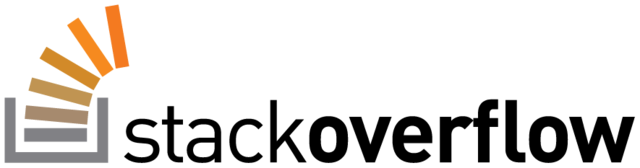

In [1]:
pip install opendatasets


Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
od.download("stackoverflow-developer-survey-2020")

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [4]:
import pandas as pd 
survey=pd.read_csv("survey_results_public.csv")

In [5]:
survey

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


# Data Preparation and Cleaning

In [6]:
#with the help of index-col we will be able to set the index according to or given coloumn
#by usingQuestionText we can convert the data frame into simple txt 
survey_ques=pd.read_csv("survey_results_schema.csv",index_col="Column").QuestionText

In [7]:
survey_ques

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
survey_ques.describe()

count                                                    61
unique                                                   52
top       Which of the following describe you, if any? P...
freq                                                      3
Name: QuestionText, dtype: object

In [9]:
survey_ques["YearsCode"]

'Including any education, how many years have you been coding in total?'

In [10]:
selected_coloumn=['Country','Age','Gender','EdLevel','UndergradMajor',
                  'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith',
                 'LanguageDesireNextYear',
                 'NEWLearn',
                 'NEWStuck',
                 'Employment',
                 'DevType',
                 'WorkWeekHrs',
                 'JobSat',
                 'JobFactors',
                 'NEWOvertime']

In [11]:
len(selected_coloumn)

19

In [12]:
s=survey[selected_coloumn].copy()

In [13]:
s

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN


In [14]:
schema=survey_ques[selected_coloumn]

In [15]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [16]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [17]:
s.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [18]:
#to change the datatype of rows
s['Age1stCode']=pd.to_numeric(s.Age1stCode,errors='coerce')
s['YearsCode']=pd.to_numeric(s.YearsCode,errors='coerce')
s['YearsCodePro']=pd.to_numeric(s.YearsCodePro,errors='coerce')

In [19]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
s.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [21]:
s.Age.unique()

array([  nan,  25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,
        27. ,  45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,
        34. ,  19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,
        21. ,  48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,
        63. ,  33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,
        46. ,  49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,
        70. ,  11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,
        65. ,  66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,
        77. ,  15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,
        96. ,  26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,
        79. , 279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,
        19.8,   7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,
        23.4,  95. ,  14.5])

In [22]:
s.drop(s[s.Age<10].index,inplace=True)
s.drop(s[s.Age>100].index,inplace=True)

In [23]:
s.Age.unique()

array([ nan, 25. , 31. , 36. , 30. , 22. , 23. , 49. , 53. , 27. , 45. ,
       32. , 24. , 40. , 18. , 39. , 29. , 16. , 34. , 19. , 35. , 20. ,
       38. , 57. , 28. , 17. , 44. , 21. , 48. , 26. , 42. , 55. , 37. ,
       50. , 41. , 64. , 63. , 33. , 43. , 51. , 60. , 59. , 62. , 69. ,
       52. , 46. , 49.5, 56. , 47. , 15. , 72. , 13. , 71. , 54. , 70. ,
       11. , 14. , 61. , 26.8, 86. , 58. , 67. , 94. , 65. , 66. , 84. ,
       73. , 78. , 68. , 99. , 74. , 12. , 77. , 15.5, 85. , 76. , 35.7,
       32.5, 81. , 23.8, 97. , 96. , 26.5, 24.5, 14.7, 34.5, 20.5, 79. ,
       22.5, 27.5, 32.8, 10. , 89. , 80. , 98. , 19.8, 21.5, 31.5, 88. ,
       39.5, 16.5, 75. , 83. , 23.4, 95. , 14.5])

In [24]:
s.drop(s[s.WorkWeekHrs<168].index,inplace=True)

In [25]:
survey_ques.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [26]:
s.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
50982,Italy,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,11.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;Haskell;H...,Bash/Shell/PowerShell;C;C++;Python;Swift,Once every few years,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,NaN,NaN
57726,Canada,75.0,Man,"Professional degree (JD, MD, etc.)","A health science (such as nursing, pharmacy, r...",Yes,22.0,35.0,NaN,Swift,NaN,Once every few years,NaN,Retired,NaN,NaN,NaN,NaN,NaN
38313,Algeria,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed part-time,NaN,NaN,NaN,NaN,NaN
58157,Norway,17.0,Man,Primary/elementary school,NaN,Yes,8.0,4.0,NaN,HTML/CSS;JavaScript;Python,C++;Java;Python;SQL,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,Diversity of the company or organization;Langu...,NaN
20456,France,52.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,40.0,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,C#;HTML/CSS;Kotlin;Python;R;Rust;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, but looking for work","Database administrator;Developer, back-end;Dev...",NaN,NaN,Industry that I’d be working in;Remote work op...,NaN
18741,Canada,20.0,Man,"Associate degree (A.A., A.S., etc.)","Information systems, information technology, o...",Yes,13.0,6.0,NaN,C#;C++;Dart;HTML/CSS;Java;JavaScript;SQL;TypeS...,Assembly;C#;C++;Java;JavaScript;Rust;SQL;TypeS...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN
39655,United Kingdom,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A humanities discipline (such as literature, h...",Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;SQL,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN
63075,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;JavaScript,NaN,Every few months,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
5238,India,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,5.0,NaN,C;C++;HTML/CSS;Java;Python,C;Java,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,NaN,NaN
25930,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,6.0,NaN,Bash/Shell/PowerShell;C++;Haskell;JavaScript;P...,Julia,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Student,NaN,NaN,NaN,Diversity of the company or organization;Oppor...,NaN


In [27]:
s['Gender'].value_counts()

Man                                                            11534
Woman                                                           1120
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       13
Name: Gender, dtype: int64

# Exploratory Data Analysis

In [28]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)


In [29]:
#unique() gives the unique value 
#nunique() tells about the no of unique values
s.Country.nunique()

177

In [30]:
top_countries=s.Country.value_counts().head(10)

In [31]:
top_countries

India             4377
United States     3375
Germany           1191
United Kingdom     981
Canada             693
France             621
Brazil             551
Pakistan           409
Netherlands        407
Nigeria            397
Name: Country, dtype: int64

In [32]:
s.Country.value_counts()

India               4377
United States       3375
Germany             1191
United Kingdom       981
Canada               693
                    ... 
Kiribati               1
Nauru                  1
Papua New Guinea       1
Saint Lucia            1
Monaco                 1
Name: Country, Length: 177, dtype: int64

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


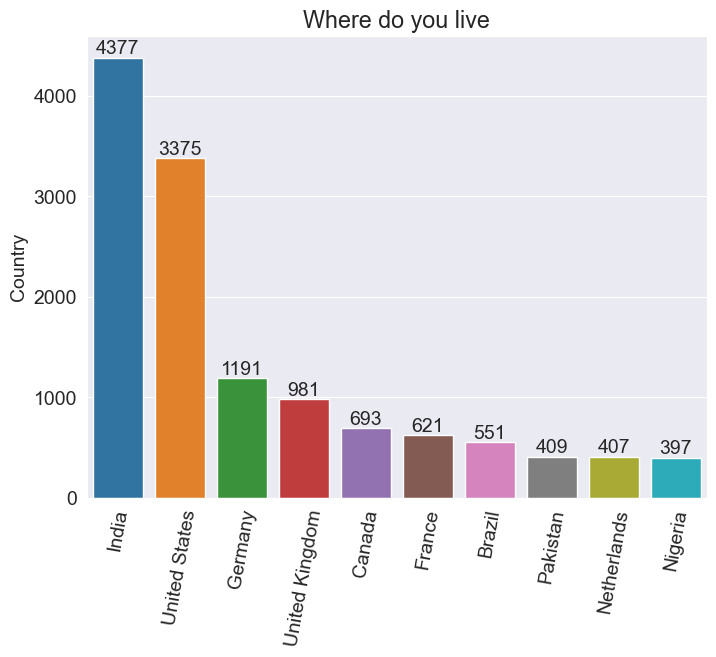

In [33]:
plt.figure(figsize=(8,6))
plt.title("Where do you live")
ax=sns.barplot(top_countries.index,top_countries)
#xticks function helps to rotate the function 
plt.xticks(rotation=80)
for i in ax.containers:
    ax.bar_label(i,)

In [34]:
s.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([2.060e+02, 2.135e+03, 3.785e+03, 1.654e+03, 8.640e+02, 5.620e+02,
        3.640e+02, 2.610e+02, 1.590e+02, 1.190e+02, 9.400e+01, 7.000e+01,
        3.900e+01, 1.600e+01, 7.000e+00, 2.000e+00, 3.000e+00]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
        95]),
 <BarContainer object of 17 artists>)

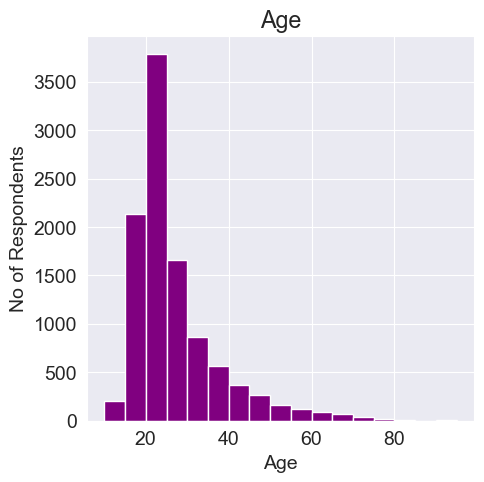

In [35]:
import numpy as np 
plt.figure(figsize=(5,5))
plt.title("Age")
plt.xlabel("Age")
plt.ylabel ("No of Respondents")
plt.hist(s.Age,bins=np.arange(10,100,5),color='purple')


In [36]:
s.Gender

1        NaN
2        NaN
4        Man
5        Man
6        NaN
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Gender, Length: 23397, dtype: object

In [37]:
gender_count=s.Gender.value_counts()

In [38]:
gender_count

Man                                                            11534
Woman                                                           1120
Non-binary, genderqueer, or gender non-conforming                124
Woman;Man                                                         44
Woman;Non-binary, genderqueer, or gender non-conforming           33
Man;Non-binary, genderqueer, or gender non-conforming             33
Woman;Man;Non-binary, genderqueer, or gender non-conforming       13
Name: Gender, dtype: int64

(array([], dtype=float64), [])

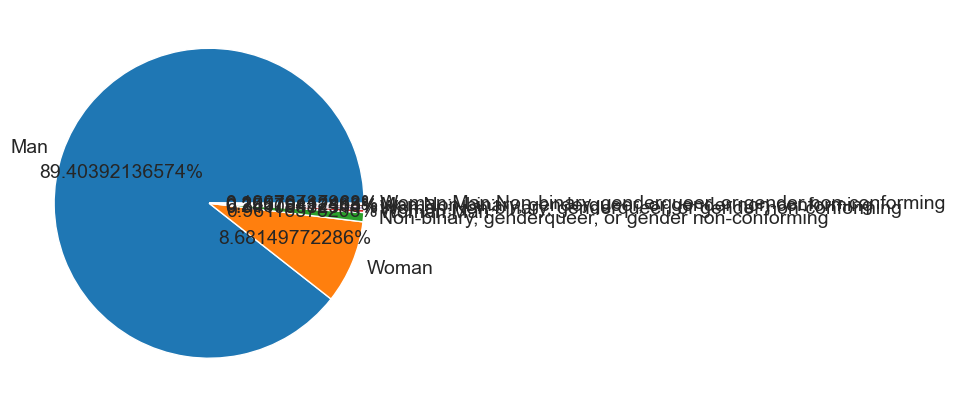

In [39]:
#
plt.figure(figsize=(5,6))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.11f%%')
plt.xticks(rotation=80)

In [40]:
s.EdLevel

1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2                                                      NaN
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5        Secondary school (e.g. American high school, G...
6             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                               ...                        
64456      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
64457                                                  NaN
64458                            Primary/elementary school
64459                                                  NaN
64460           Other doctoral degree (Ph.D., Ed.D., etc.)
Name: EdLevel, Length: 23397, dtype: object

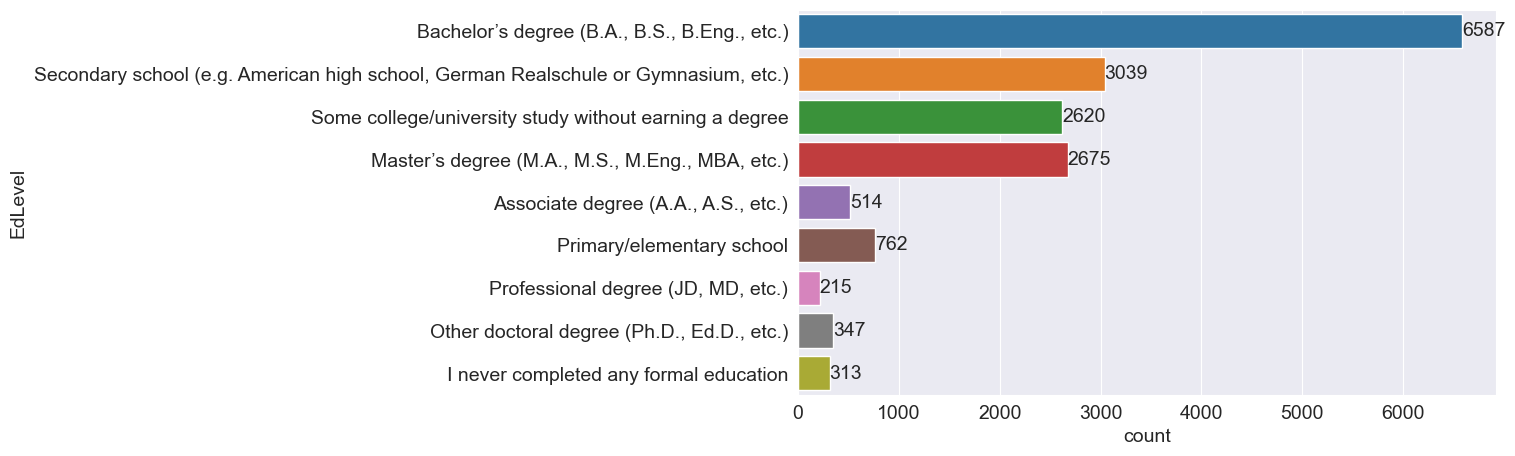

<Figure size 500x600 with 0 Axes>

In [41]:
#to plot the graph in horizontal way we can use y =
ab=sns.countplot(y=s.EdLevel)
#plt.xticks(rotation=80)
plt.figure(figsize=(5,6))
for i in ab.containers:
    ab.bar_label(i,)


In [42]:
UndergradMajor=s.UndergradMajor.value_counts()*100/s.UndergradMajor.count()

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


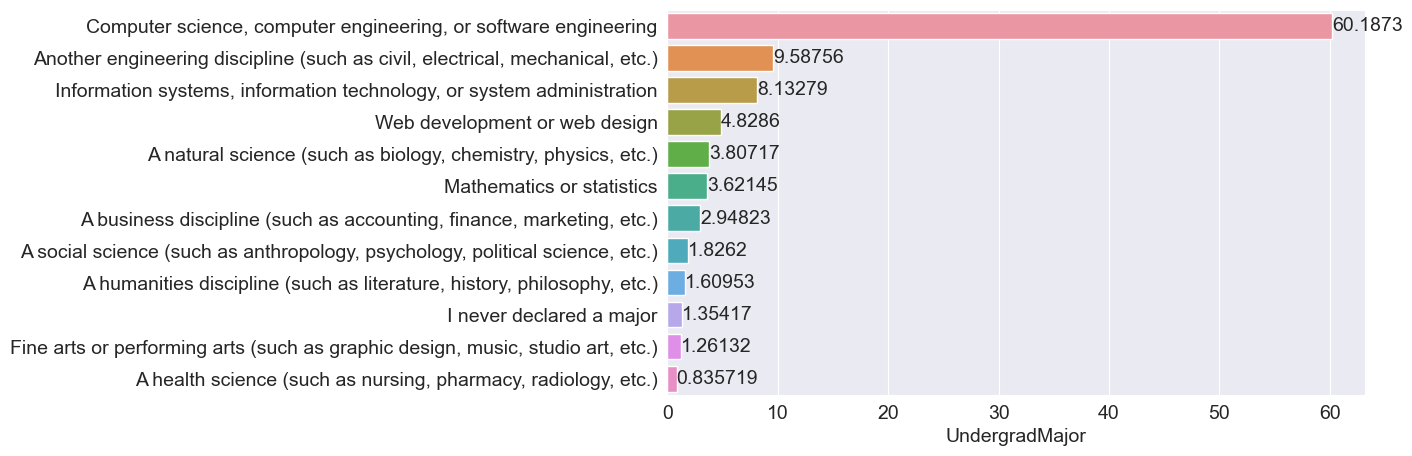

<Figure size 500x600 with 0 Axes>

In [43]:
ag=sns.barplot(UndergradMajor,UndergradMajor.index)
plt.figure(figsize=(5,6))
for i in ag.containers:
    ag.bar_label(i,)


In [44]:
s.Employment

1        Employed full-time
2                       NaN
4        Employed full-time
5        Employed full-time
6        Employed full-time
                ...        
64456    Employed full-time
64457    Employed full-time
64458                   NaN
64459    Employed full-time
64460    Employed full-time
Name: Employment, Length: 23397, dtype: object

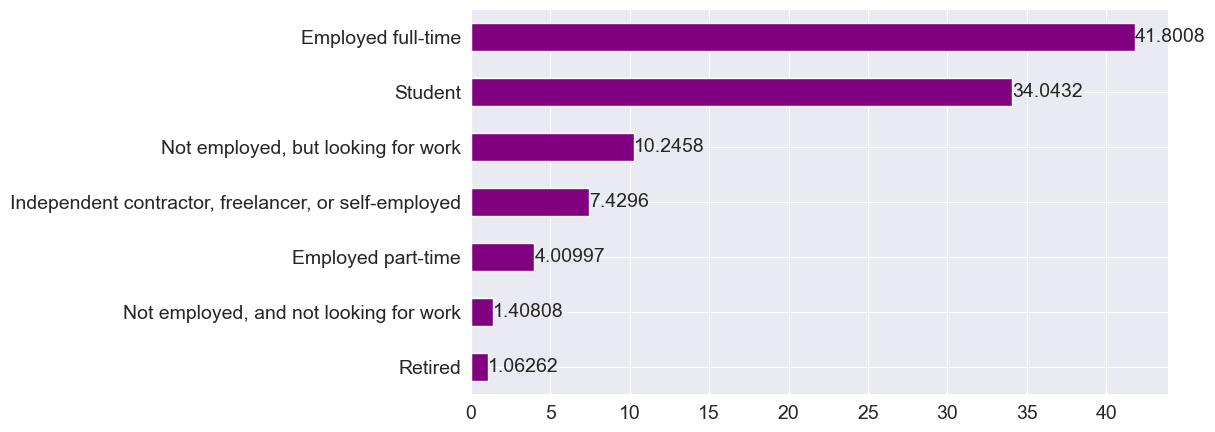

In [45]:
#normalize=true set percentage
ak=(s.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind="barh",color='purple')
for i in ak.containers:
    ak.bar_label(i,)

In [46]:
s.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [48]:
language=split_multicolumn(s.LanguageWorkedWith)

In [49]:
language

,JavaScript,Swift,Objective-C,Python,HTML/CSS,Ruby,SQL,Java,C#,PHP,...,R,Julia,Assembly,Kotlin,Go,VBA,Rust,Dart,Haskell,Perl
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
language_percentage=language.mean().sort_values(ascending=False)*100


In [51]:
language_percentage

HTML/CSS                 48.890883
JavaScript               47.189811
Python                   38.013421
SQL                      36.786768
Java                     34.936103
C++                      25.524640
C                        24.562978
PHP                      21.729282
C#                       21.216395
Bash/Shell/PowerShell    19.810232
TypeScript               13.044407
Assembly                  7.753131
Kotlin                    5.577638
Go                        5.334017
R                         5.154507
VBA                       4.650169
Rust                      4.504851
Swift                     4.385178
Ruby                      4.248408
Dart                      3.927854
Objective-C               2.649912
Haskell                   2.393469
Perl                      2.051545
Scala                     2.042997
Julia                     1.025773
dtype: float64

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


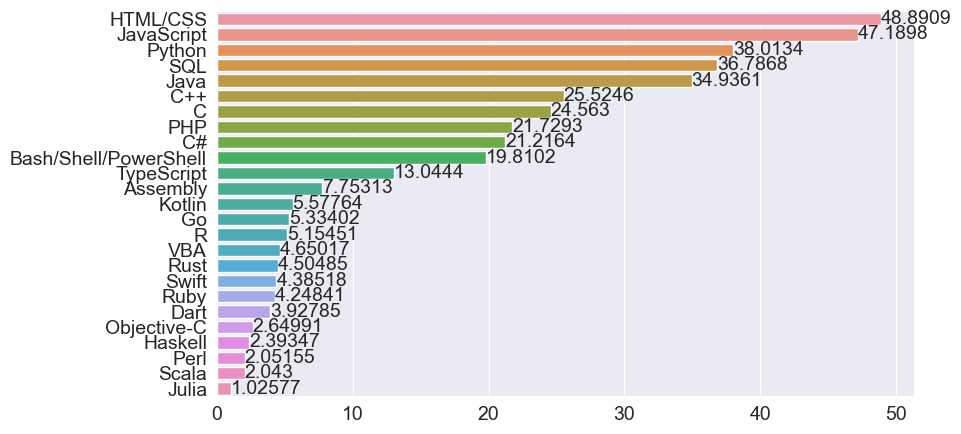

In [52]:
au=sns.barplot(language_percentage,language_percentage.index)
for i in au.containers:
    au.bar_label(i,);

In [53]:

s.LanguageDesireNextYear


1                                             Python;Swift
2                                 Objective-C;Python;Swift
4                                          Java;Ruby;Scala
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 23397, dtype: object

In [54]:
lang_next=split_multicolumn(s.LanguageDesireNextYear)

In [55]:
lang_next

,Python,Swift,Objective-C,Java,Ruby,Scala,HTML/CSS,JavaScript,C#,PHP,...,C++,Perl,SQL,Kotlin,R,VBA,Julia,Haskell,Rust,Dart
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
lang_next_percentage=lang_next.mean().sort_values(ascending=False)*100
lang_next_percentage

Python                   38.620336
JavaScript               33.602599
HTML/CSS                 26.678634
SQL                      23.891952
Java                     21.053981
C++                      18.083515
TypeScript               16.942343
C#                       16.694448
Go                       14.112920
Bash/Shell/PowerShell    13.074326
Kotlin                   12.877719
PHP                      12.172501
Rust                     12.151130
C                        11.548489
Swift                     8.364320
Dart                      7.176134
R                         7.026542
Ruby                      6.270035
Assembly                  5.551994
Haskell                   4.487755
Scala                     4.034705
Julia                     2.803778
Objective-C               2.688379
Perl                      2.119930
VBA                       2.077189
dtype: float64

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


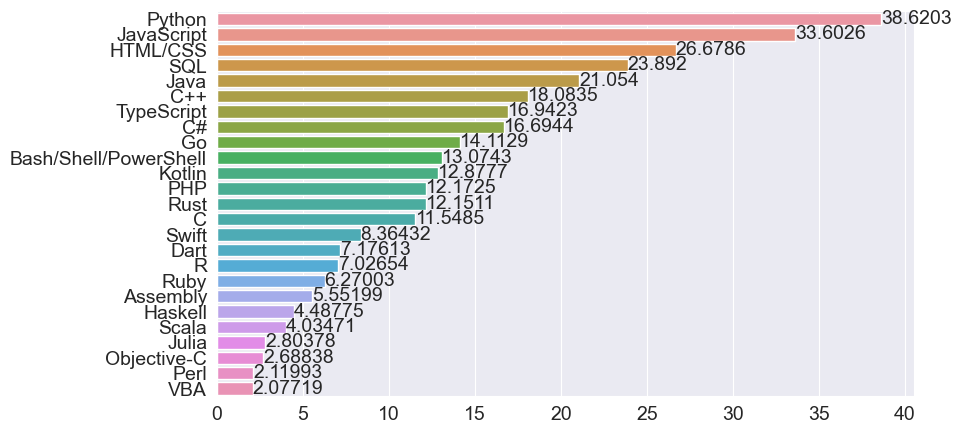

In [57]:
ai=sns.barplot(lang_next_percentage,lang_next_percentage.index)
for i in ai.containers:
    ai.bar_label(i,)

In [58]:
#combining two cases to check which language is most like by students 
lang_loved=language & lang_next 
lang_loved

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
lang_loved_percentage=(lang_loved.sum()*100/language.sum()).sort_values(ascending=False)

In [60]:
lang_loved_percentage

Rust                     84.345351
Python                   63.919496
Julia                    59.583333
Dart                     59.521219
TypeScript               59.141547
Swift                    56.920078
Go                       56.650641
Kotlin                   56.475096
JavaScript               54.596504
C#                       50.745367
Bash/Shell/PowerShell    50.614887
SQL                      50.273034
Haskell                  49.107143
HTML/CSS                 48.247224
Scala                    48.117155
C++                      42.146685
Java                     41.852214
R                        40.630182
Ruby                     39.839034
PHP                      35.975610
Perl                     31.875000
C                        31.372890
Assembly                 30.209482
Objective-C              27.258065
VBA                      23.161765
dtype: float64

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


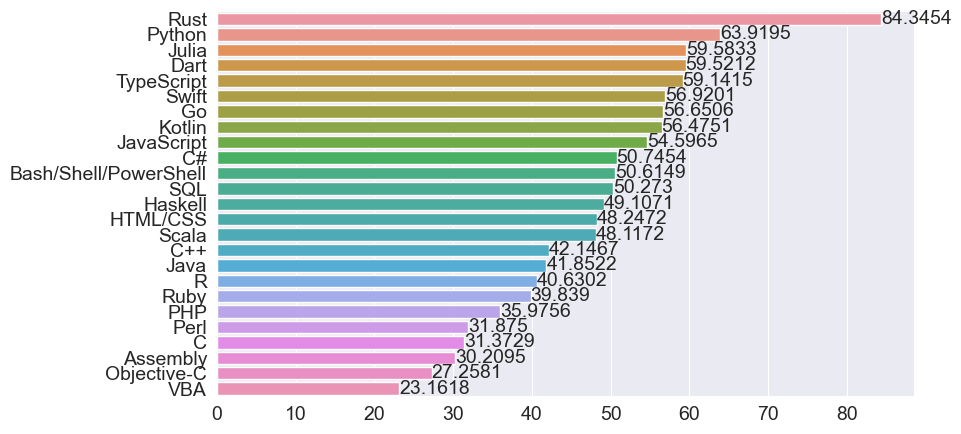

In [61]:
g=sns.barplot(lang_loved_percentage,lang_loved_percentage.index)
for i in g.containers:
    g.bar_label(i,)

In [62]:
countries=s.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
countries

,WorkWeekHrs
Country,
Turkey,425.000000
France,401.200000
Austria,393.833333
Denmark,385.000000
Netherlands,375.000000
...,...
"Venezuela, Bolivarian Republic of...",NaN
Viet Nam,NaN
Yemen,NaN


In [63]:
high_response_country=countries.loc[s.Country.value_counts()>250].head(15)

In [64]:
high_response_country

,WorkWeekHrs
Country,
Turkey,425.000000
France,401.200000
Netherlands,375.000000
Sweden,375.000000
United Kingdom,375.000000
Italy,375.000000
Canada,375.000000
Spain,375.000000
Germany,354.444444


In [65]:
#AGE vs YearsCodePro
s.YearsCodePro


1        4.0
2        NaN
4        8.0
5        4.0
6        4.0
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: YearsCodePro, Length: 23397, dtype: float64

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AGE vs YearsCodePro')

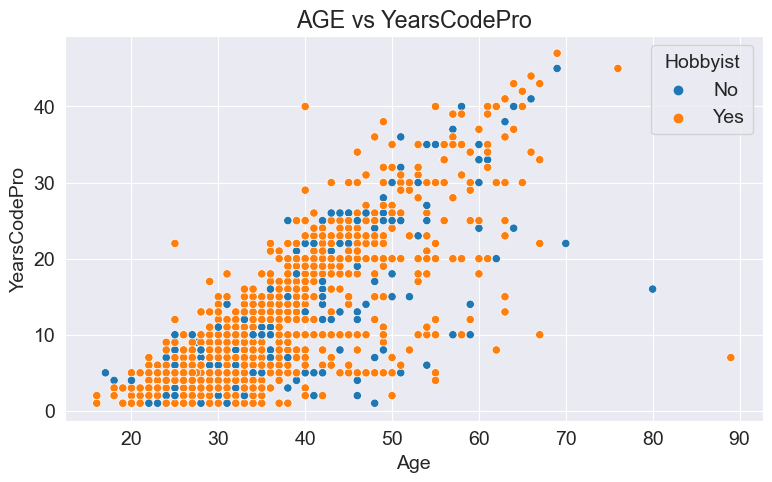

In [66]:
sns.scatterplot('Age','YearsCodePro',hue='Hobbyist',data=s)
plt.xlabel("Age")
plt.ylabel("YearsCodePro")
plt.title("AGE vs YearsCodePro")

C:\Users\hare krishna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 300x400 with 0 Axes>

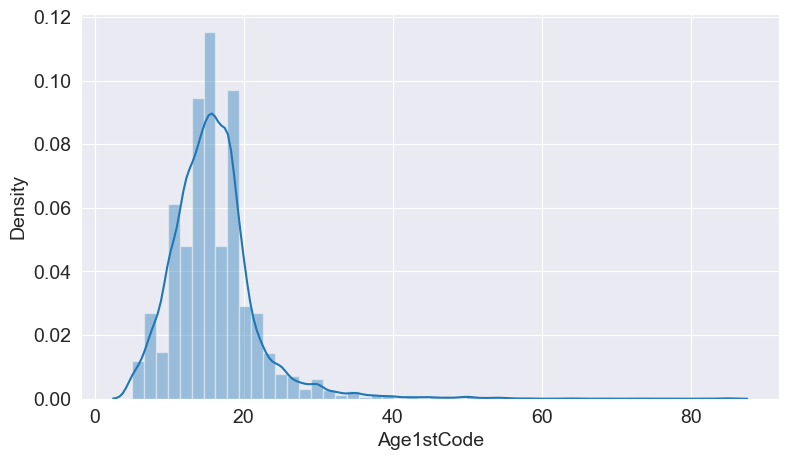

<Figure size 300x400 with 0 Axes>

In [67]:
sns.distplot(s.Age1stCode)
plt.figure(figsize=(3,4))